In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nMTCD = 50000
MTCD_grouping = pd.read_csv(f'MTCD_grouping_{nMTCD}.csv', index_col=False)
MTCD_grouping.head()

,MTCD_id,x,y,clusters
0,0,713.906,26.381,0
1,1,-192.164,212.341,1
2,2,336.242,-862.241,2
3,3,-687.205,-187.807,3
4,4,-272.437,-125.719,4


In [3]:
np.unique(MTCD_grouping.clusters)

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    15,    16,    17,    18,
          19,    21,    24,    25,    26,    27,    29,    31,    32,
          34,    35,    36,    37,    38,    39,    40,    41,    42,
          43,    44,    45,    48,    49,    50,    52,    55,    57,
          59,    60,    61,    62,    63,    65,    66,    68,    69,
          70,    71,    72,    73,    74,    76,    81,    82,    83,
          86,    89,    90,    91,    92,    94,    95,    96,    98,
          99,   100,   101,   102,   103,   108,   110,   114,   115,
         117,   118,   122,   134,   135,   142,   145,   146,   147,
         153,   161,   163,   164,   166,   170,   171,   172,   176,
         179,   183,   188,   189,   190,   192,   193,   196,   206,
         207,   209,   214,   222,   230,   236,   249,   250,   255,
         259,   274,   277,   281,   290,   308,   332,   337,   347,
         349,   357,

In [4]:
group_sizes = MTCD_grouping['clusters'].value_counts().sort_index()
group_sizes

0        236
1        329
2        213
3        270
4        238
        ... 
17425    194
21127     94
22067    203
30600    196
31896     87
Name: clusters, Length: 228, dtype: int64

In [5]:
print(max(group_sizes), min(group_sizes), np.average(group_sizes))

357 77 219.2982456140351


<BarContainer object of 228 artists>

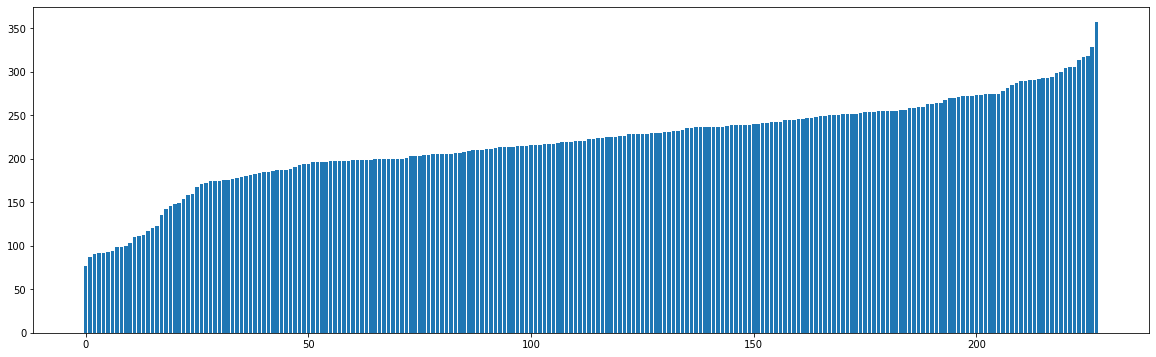

In [6]:
plt.figure(figsize=(20,6))
x = np.arange(len(group_sizes))
plt.bar(x,sorted(group_sizes.values))

<BarContainer object of 129 artists>

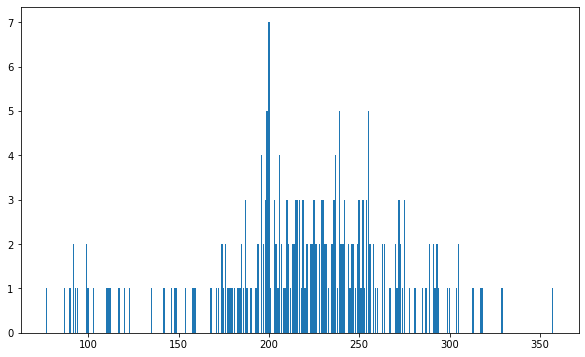

In [7]:
plt.figure(figsize=(10,6))
plt.bar(group_sizes.value_counts().index,group_sizes.value_counts().values)

In [9]:
MTCD_RA = pd.read_csv(f'MTCD_RA_Time_{nMTCD}.csv', index_col=False)
MTCD_RA.head()

,RA_init,RA_first,RA_success,RA_transmit
0,704,704,-1,0
1,365,365,-1,0
2,205,205,-1,0
3,664,664,-1,0
4,713,713,-1,0


In [10]:
MTCD_data = pd.concat([MTCD_grouping, MTCD_RA], axis=1,sort=False)

In [11]:
MTCD_data

,MTCD_id,x,y,clusters,RA_init,RA_first,RA_success,RA_transmit
0,0,713.906,26.381,0,704,704,-1,0
1,1,-192.164,212.341,1,365,365,-1,0
2,2,336.242,-862.241,2,205,205,-1,0
3,3,-687.205,-187.807,3,664,664,-1,0
4,4,-272.437,-125.719,4,713,713,-1,0
...,...,...,...,...,...,...,...,...
49995,49995,415.093,385.389,249,348,348,-1,0
49996,49996,-585.113,617.442,349,409,409,-1,0
49997,49997,-98.037,33.370,35,691,691,-1,0
49998,49998,-585.478,-410.794,65,374,374,-1,0


In [12]:
MTCD_data.to_csv(f'MTCD_data_{nMTCD}.csv', index=False)